In [70]:
import os
from pathlib import Path

from IPython import get_ipython
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [71]:
# Specify paths to data directory and output directory (../data and ../output relative to notebook)
DATA_DIR = Path(get_ipython().getoutput('pwd')[0]).parent / 'data'
METADATA_DIR = DATA_DIR.parent / 'data_prep' / 'metadata'
OUTPUT_DIR = DATA_DIR.parent / 'output'

In [72]:
# Read in dataframes

matrisome_counts = pd.read_csv(DATA_DIR / 'all'/ 'all_phases_all_matrisome_counts.tsv', sep='\t', index_col=0)
labels = pd.read_csv(METADATA_DIR / 'stagewise_coldata.tsv', sep='\t', index_col=0)

In [74]:
OUTPUT_DIR

PosixPath('/media/data/lab/gene/characterizing-endometriosis-transcriptome/output')

/home/bean/miniconda3/envs/tissue-model-analysis/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


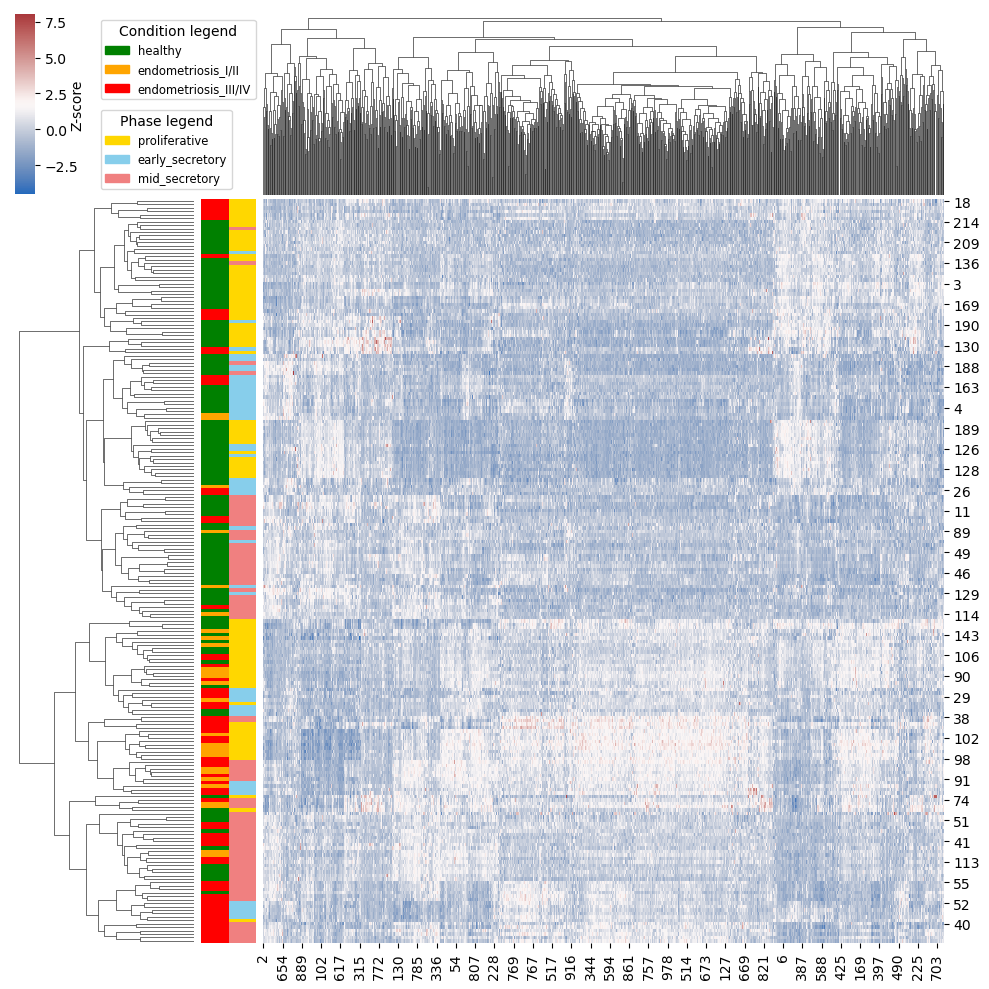

In [73]:
# Scale data and compute clustermap with hierarchical clustering

matrisome_counts_scaled = StandardScaler().fit_transform(
    matrisome_counts.transpose()
)

condition_to_color = {
    'healthy': 'green',
    'endometriosis_I/II': 'orange',
    'endometriosis_III/IV': 'red'
}

phase_to_color = {
    'proliferative': 'gold',
    'early_secretory': 'skyblue',
    'mid_secretory': 'lightcoral'
}

condition_row_colors = labels['condition'].map(condition_to_color).to_numpy()
phase_row_colors = labels['phase'].map(phase_to_color).to_numpy()

g = sns.clustermap(
    matrisome_counts_scaled,
    row_colors=[condition_row_colors, phase_row_colors],  # Colored sidebar
    method='complete',              # Linkage
    cmap='vlag',                    # Color palette
    figsize=(10, 10),               # Figure size
    cbar_kws={'label': 'Z-score', 'shrink': 0.5},  # Colorbar label
)

# Change colorbar width
cbar = g.cax
new_width = 0.02
box = cbar.get_position()
cbar.set_position([box.x0, box.y0, new_width, box.height])

# Adjust colorbar label position
cbar.yaxis.set_label_position('left')
cbar.yaxis.labelpad = -50

# Add legends
condition_patches = [mpatches.Patch(color=color, label=label) for label, color in condition_to_color.items()]
phase_patches = [mpatches.Patch(color=color, label=label) for label, color in phase_to_color.items()]
condition_legend = plt.legend(handles=condition_patches, bbox_to_anchor=(4, 1), loc='upper left', fontsize='small', title='Condition legend')
phase_legend = plt.legend(handles=phase_patches, bbox_to_anchor=(4, .5), loc='upper left', fontsize='small', title='Phase legend')
plt.gca().add_artist(condition_legend)

# Show figure
plt.show()

# Create output directory if it does not exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save figure to output directory
output_file_path = OUTPUT_DIR / 'clustermap_all_samples_matrisome.png'
g.savefig(output_file_path, dpi=500)